# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
#Observations:
#1) Based on this data, it seems that there are more cities at extreme latitudes and above (60 and -60) 
#in the north rather than southern hemisphere. In general, the closer a location is to a latitude of 0 the warmer it is.
#2) Based on this data, it seems that humidity is about the same between the northern and sourthern hemispheres. 
#Additionally, at the more extreme latitudes (60 and -60), humidity tends to not drop below 40%. 
#3) The highest observed wind speeds occured above or below 60 and -60 latitudes. But other than a few observations, 
#there does not seem to be a relationship between wind speed and latitude. 

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
api_key = "c945d90c7a0f085bd397974e8ffa16d4"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
temp_list = []
date_list = []
humid_list = []
la_list = []
lo_list = []
max_temp_list = []
wind_list = []
cloud_list= []

counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"

In [16]:
for ci in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + ci
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temp_list.append(weather_json["main"]["temp"] * 9/5 - 459.67)
        date_list.append(weather_json["dt"])
        humid_list.append(weather_json["main"]["humidity"])
        la_list.append(weather_json["coord"]["lat"])
        lo_list.append(weather_json["coord"]["lon"])
        max_temp_list.append(weather_json["main"]["temp_max"]* 9/5 - 459.67)
        wind_list.append(weather_json["wind"]["speed"])
        cloud_list.append(weather_json["clouds"]["all"])
        counter = counter +1
        city_name = weather_json["name"]
        print(f"Processing Record {counter} | {city_name}" )
#         print("Processing Record" + str(counter)+":"+weather_json["name"])
    except KeyError:
        print("City not found. Skipping...")
print(
"----------"
"Data Retrieval Complete"
"----------")

Processing Record 1 | Saint George
City not found. Skipping...
Processing Record 2 | Albany
Processing Record 3 | Nome
Processing Record 4 | Hermanus
Processing Record 5 | Hasaki
Processing Record 6 | Lebu
Processing Record 7 | Saskylakh
Processing Record 8 | Castro
Processing Record 9 | Sorong
Processing Record 10 | Mount Gambier
Processing Record 11 | Hambantota
Processing Record 12 | Verkhoyansk
Processing Record 13 | Alofi
Processing Record 14 | Rikitea
Processing Record 15 | Kastamonu
Processing Record 16 | Qaanaaq
Processing Record 17 | Altamira
Processing Record 18 | Arraial do Cabo
Processing Record 19 | Nuuk
Processing Record 20 | Puerto Ayora
Processing Record 21 | Ushuaia
Processing Record 22 | Rodez
Processing Record 23 | Saint-Philippe
Processing Record 24 | Nikolskoye
Processing Record 25 | Cape Town
City not found. Skipping...
Processing Record 26 | Butaritari
Processing Record 27 | Deogarh
Processing Record 28 | Carnarvon
Processing Record 29 | Tianpeng
Processing Recor

Processing Record 233 | Berlevag
Processing Record 234 | Nyurba
Processing Record 235 | Adrar
Processing Record 236 | Mahebourg
Processing Record 237 | Athabasca
Processing Record 238 | Santa Catalina
City not found. Skipping...
City not found. Skipping...
Processing Record 239 | Hervey Bay
Processing Record 240 | San Carlos de Bariloche
Processing Record 241 | Surt
Processing Record 242 | Dezhou
Processing Record 243 | Somovo
Processing Record 244 | Pinawa
Processing Record 245 | Arkhangelskoye
Processing Record 246 | Srednekolymsk
Processing Record 247 | Hawkesbury
Processing Record 248 | Fort Nelson
Processing Record 249 | Bijie
Processing Record 250 | Gizo
City not found. Skipping...
Processing Record 251 | Yumen
Processing Record 252 | Newport
Processing Record 253 | Caravelas
Processing Record 254 | Pimentel
Processing Record 255 | Nouadhibou
Processing Record 256 | Ozernovskiy
City not found. Skipping...
Processing Record 257 | Waddan
Processing Record 258 | Talas
Processing Rec

Processing Record 454 | Makakilo City
City not found. Skipping...
City not found. Skipping...
Processing Record 455 | Tsagan Aman
Processing Record 456 | Baykit
Processing Record 457 | Santiago de Cao
Processing Record 458 | Katherine
Processing Record 459 | Poya
Processing Record 460 | Sept-Iles
City not found. Skipping...
Processing Record 461 | Vao
Processing Record 462 | Clinton
Processing Record 463 | Velikodvorskiy
Processing Record 464 | Shenjiamen
Processing Record 465 | Salisbury
Processing Record 466 | Kenai
Processing Record 467 | Sorland
Processing Record 468 | Kavaratti
Processing Record 469 | Kawalu
Processing Record 470 | Zabaykalsk
Processing Record 471 | Inuvik
City not found. Skipping...
Processing Record 472 | Aasiaat
Processing Record 473 | Udachnyy
Processing Record 474 | Cobija
Processing Record 475 | Ust-Tsilma
Processing Record 476 | College
Processing Record 477 | Limon
City not found. Skipping...
Processing Record 478 | Westport
Processing Record 479 | Paslek


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df = pd.DataFrame({
    "Temperature (F)": temp_list,
    "Date": date_list,
    "Humidity": humid_list, 
    "Latitude": la_list, 
    "Longitude": lo_list, 
    "Maximum Temperature (F)": max_temp_list, 
    "Wind Speed": wind_list,
    "Clouds": cloud_list
})

weather_df.to_csv (r"/Users/alexsnyder96/Desktop/weather.csv")

weather_df.head()

,Clouds,Date,Humidity,Latitude,Longitude,Maximum Temperature (F),Temperature (F),Wind Speed
0,0,1552898012,67,39.45,22.34,64.400,61.196,1.42
1,75,1552898210,53,42.65,-73.75,28.004,23.270,3.10
2,1,1552898425,87,30.04,-94.42,48.002,44.420,1.87
3,0,1552897893,84,-34.42,19.24,73.994,73.562,1.52
4,75,1552898076,61,35.73,140.83,51.998,51.062,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

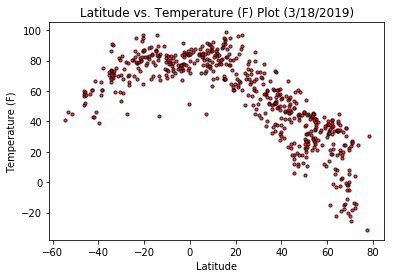

In [21]:
x_axis = weather_df["Latitude"]

data = weather_df["Temperature (F)"]

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75)
plt.title("Latitude vs. Temperature (F) Plot (3/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("Latitude vs. Temperature Plot.png")

plt.show()

#### Latitude vs. Humidity Plot

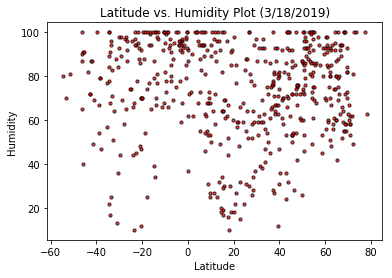

In [22]:
data = weather_df["Humidity"]

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75)
plt.title("Latitude vs. Humidity Plot (3/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Latitude vs. Humidity Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

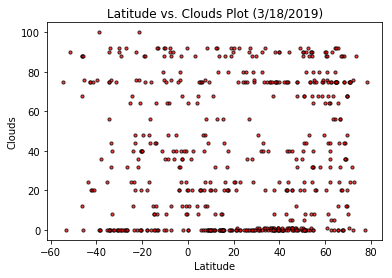

In [23]:
data = weather_df["Clouds"]

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75)

plt.title("Latitude vs. Clouds Plot (3/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

plt.savefig("Latitude vs. Clouds Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

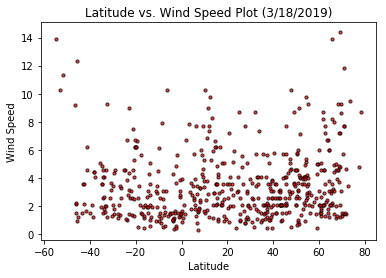

In [24]:
# List of values from 0 to 100 each value being 1 greater than the last
x_axis = weather_df["Latitude"]

# Create a random array of data that we will use for our y values
data = weather_df["Wind Speed"]

plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=10, alpha=0.75)

plt.title("Latitude vs. Wind Speed Plot (3/18/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Latitude vs. Wind Speed Plot.png")

plt.show()